In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 加载并查看上传的文件内容
file_path = r'Walmart_Store_sales.csv'#记得改成自己的路径，要不然不能运行
walmart_sales = pd.read_csv(file_path)

# 显示数据集的前几行以了解其结构
walmart_sales.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2021-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2021-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2021-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2021-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2021-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
# 数据预处理
# 确保日期格式正确，并将其设置为索引
walmart_sales['Date'] = pd.to_datetime(walmart_sales['Date'],format='mixed')
walmart_sales.set_index('Date', inplace=True)

# 按日期排序
walmart_sales.sort_index(inplace=True)

# 聚合数据，计算所有商店的总周销售额
total_weekly_sales = walmart_sales.groupby('Date')['Weekly_Sales'].sum()

# 显示处理后的数据集前几行
total_weekly_sales.head()


Date
2021-02-05    49750740.50
2021-02-12    48336677.63
2021-02-19    48276993.78
2021-02-26    43968571.13
2021-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

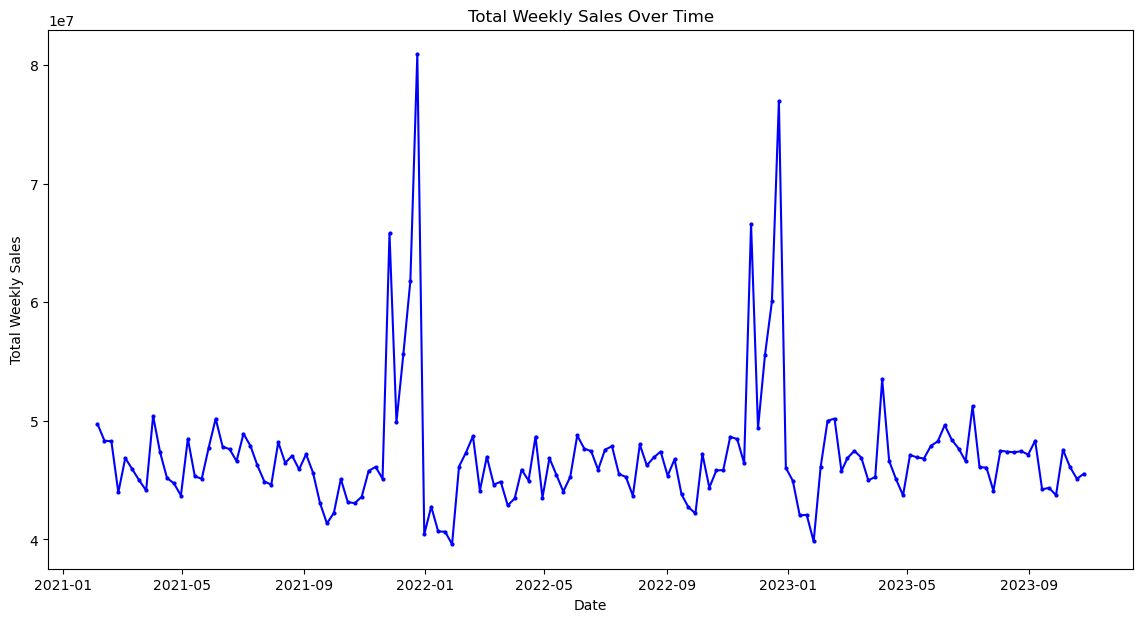

In [17]:
# 绘制总周销售额随时间变化的图
plt.figure(figsize=(14, 7))
plt.plot(total_weekly_sales.index, total_weekly_sales, marker='o', markersize=2, linestyle='-', color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()


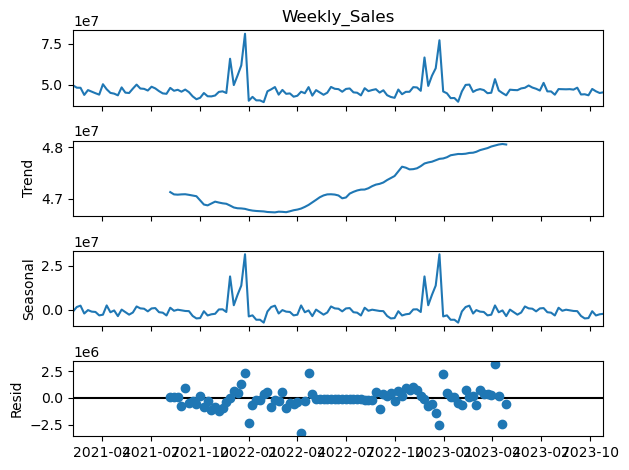

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 对销售数据进行季节性分解
decompose_result = seasonal_decompose(total_weekly_sales, model='additive', period=52)

# 绘制季节性分解的结果
decompose_result.plot()
plt.show()


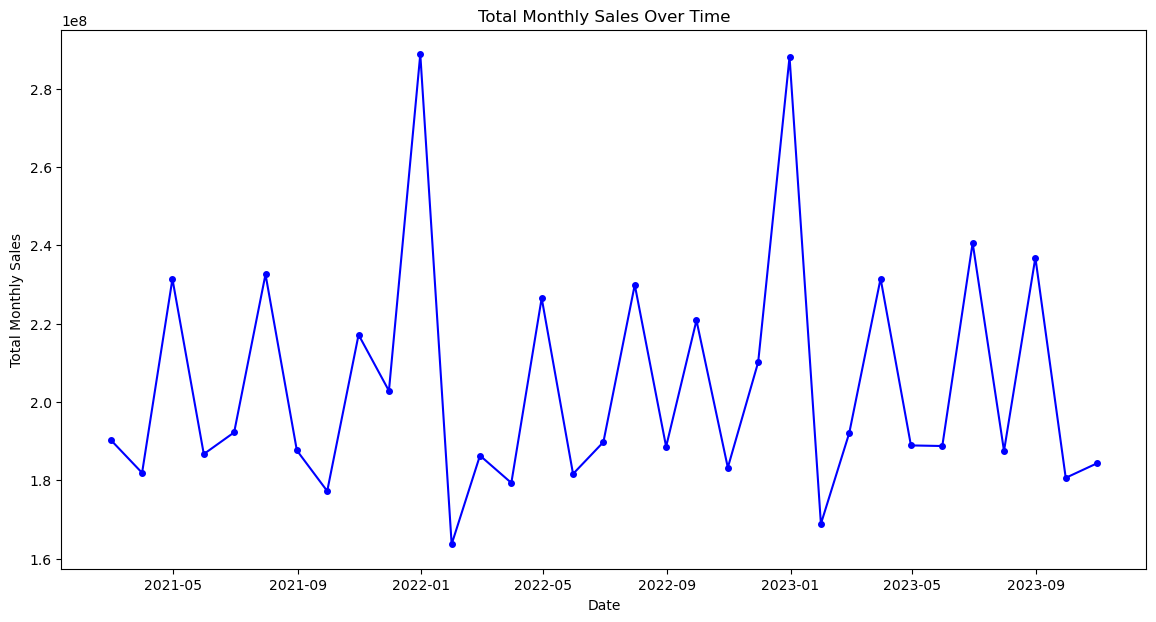

Date
2021-02-28    1.903330e+08
2021-03-31    1.819198e+08
2021-04-30    2.314124e+08
2021-05-31    1.867109e+08
2021-06-30    1.922462e+08
Freq: M, Name: Weekly_Sales, dtype: float64

In [19]:
# 按月降采样，计算每月的总销售额
monthly_sales = total_weekly_sales.resample('M').sum()

# 绘制降采样后的月销售额随时间变化的图
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, marker='o', markersize=4, linestyle='-', color='blue')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.show()

# 显示降采样后数据的前几行
monthly_sales.head()



/Users/huangrui/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


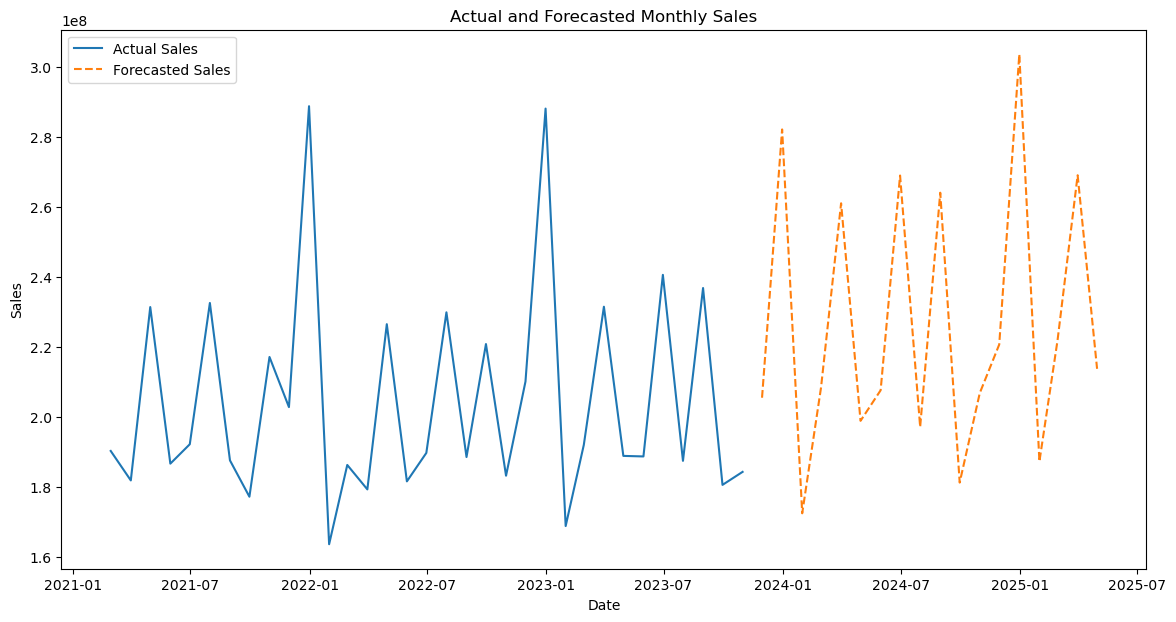

In [20]:
# 定义并拟合降采样数据的SARIMA模型
# 考虑到数据现在是按月聚合的，我们调整季节性周期为12
sarima_model_monthly = SARIMAX(monthly_sales, 
                               order=(1, 1, 1), 
                               seasonal_order=(1, 1, 1, 12), 
                               enforce_stationarity=False, 
                               enforce_invertibility=False)

# 拟合模型
sarima_model_fit_monthly = sarima_model_monthly.fit(disp=False)

# 进行未来12个月的销量预测
forecast_monthly = sarima_model_fit_monthly.forecast(steps=18)

# 预测结果绘图
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(forecast_monthly.index, forecast_monthly, label='Forecasted Sales', linestyle='--')
plt.title('Actual and Forecasted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
